In [49]:
import matplotlib.pyplot as plt
import csv

data = {'rpm':[],'car speed (kmph)':[],'idc':[],'vdc':[],'comm_torq':[],'iq': [], 'feedback_torq':[], 'accel_in': [], 'temp_a': [], 'temp_b': [], 'temp_c': [], 'temp_board': [], 'id': [], 'faults': [], 'angle': [], 'v_peak': [], 'vd': [], 'vq': [], 'v_peak_calc': []}
data_row = {'time':0,'rpm':0,'car speed (kmph)': 0, 'idc':0,'vdc':0,'comm_torq':0,'iq': 0, 'feedback_torq':0, 'accel_in': 0, 'temp_a': 0, 'temp_b': 0, 'temp_c': 0, 'temp_board':0, 'id':0, 'faults': 0, 'angle': 0}

with open('endurance_dev_10_04_evening.txt', 'r') as f:
    file = open('endurance_laps.csv', 'w', newline = '')
    # writer = csv.writer(file)
    # writer.writerow(data_row)
    lines = f.readlines()
    for line in lines:
        msg = line.split()
        if len(msg) == 12: # check for can_id and 8 bytes
            # if msg[0] == 'A2':
            #     motortemp = (int(msg[6],16)*256+int(msg[5],16))/10
            #     data['motortemp'].append(motortemp)
            if msg[2] == '0A5': # Motor Position Information
                rpm = int(msg[7],16)*256+int(msg[6],16)
                if rpm > 60000:
                    rpm = 65536 - rpm
                speed = rpm /3.77 * 0.228*2*3.1415/60*18/5
                data['rpm'].append(rpm) 
                data['car speed (kmph)'].append(speed) 
                data_row['rpm'] = (rpm) 
                data_row['car speed (kmph)'] = (speed) 
                angle = int(msg[5],16)*256+int(msg[4],16)
                if angle > 60000:
                    angle= 65536 - angle
                data['angle'].append(angle) 
                data_row['angle'] = (angle) 
                data_row['time'] = float(msg[0][1:-1])
                # writer.writerow(data_row.values())

            if msg[2] == '0A8': 
                iq = int(msg[11],16)*256+int(msg[10],16)
                if iq > 60000:
                    iq = 65536 - iq
                iq /= 10
                id_curr = int(msg[9],16)*256+int(msg[8],16)
                if id_curr > 60000:
                    id_curr = 65536 - id_curr
                id_curr /= 10
                data['id'].append(id_curr) 
                data_row['id'] = (id_curr) 
                data['iq'].append(iq) 
                data_row['iq'] = (iq) 

            if msg[2] == '0A2': 
                temp_a = int(msg[5],16)*256+int(msg[4],16)
                temp_a /= 10
                data['temp_a'].append(temp_a) 
                data_row['temp_a'] = (temp_a) 
                temp_b = int(msg[7],16)*256+int(msg[6],16)
                temp_b /= 10
                data['temp_b'].append(temp_b)
                data_row['temp_b'] = (temp_b)
                temp_c = int(msg[9],16)*256+int(msg[8],16)
                temp_c /= 10
                data['temp_c'].append(temp_c)
                data_row['temp_c'] = (temp_c)
                temp_board = int(msg[11],16)*256+int(msg[10],16)
                temp_board /= 10
                data['temp_board'].append(temp_board)
                data_row['temp_board'] = (temp_board)
            
            if msg[2] == '0A7':
                vdc = (int(msg[5],16)*256 + int(msg[4],16))/10
                data['vdc'].append(vdc)
                data_row['vdc'] = (vdc)

                v_peak = (int(msg[7],16)*256 + int(msg[6],16))
                if v_peak > 60000:
                    v_peak = 65536 - v_peak
                v_peak /= 10
                data['v_peak'].append(v_peak)
                data_row['v_peak'] = (v_peak)

                vd = (int(msg[9],16)*256 + int(msg[8],16))
                if vd > 60000:
                    vd = 65536 - vd
                vd /= 10
                data['vd'].append(vd)
                data_row['vd'] = (vd)

                vq = (int(msg[11],16)*256 + int(msg[10],16))
                if vq > 60000:
                    vq = 65536 - vq
                vq /= 10
                data['vq'].append(vq)
                data_row['vq'] = (vq)

            if msg[2] == '0A6':
                idc = (int(msg[11],16)*256 + int(msg[10],16))
                if idc > 60000:
                    idc = 65536 - idc
                idc /= 10
                data['idc'].append(idc) 
                data_row['idc'] = (idc) 
            
            if msg[2] == '0A3':
                accel_in = (int(msg[5],16)*256 + int(msg[4],16))
                data['accel_in'].append(accel_in) 
                data_row['accel_in'] = (accel_in) 

            if msg[2] == '0AB':
                faults =  msg[4] + " " + msg[5] + " " + msg[6] + " " + msg[7] + " " + msg[8] + " " + msg[9] +  " " + msg[10] +  " " + msg[11]
                data_row['faults'] = faults
                data['faults'].append(faults)
 
            if msg[2] == '0AC':
                comm_torq = (int(msg[7],16)*256 + int(msg[6],16))
                if comm_torq > 60000:
                    comm_torq = -(65536 - comm_torq)
                comm_torq = comm_torq/10
                data['comm_torq'].append(comm_torq)
                data_row['comm_torq'] = comm_torq


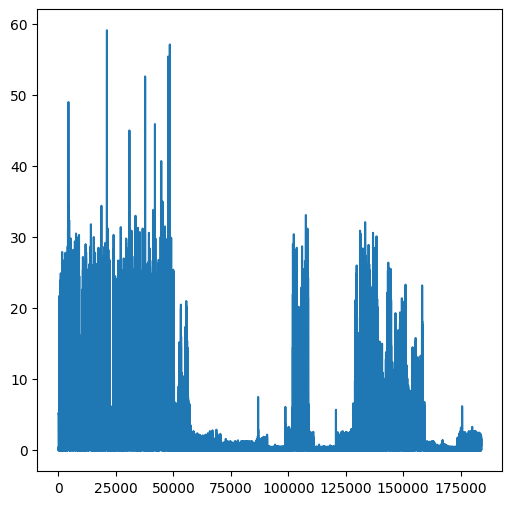

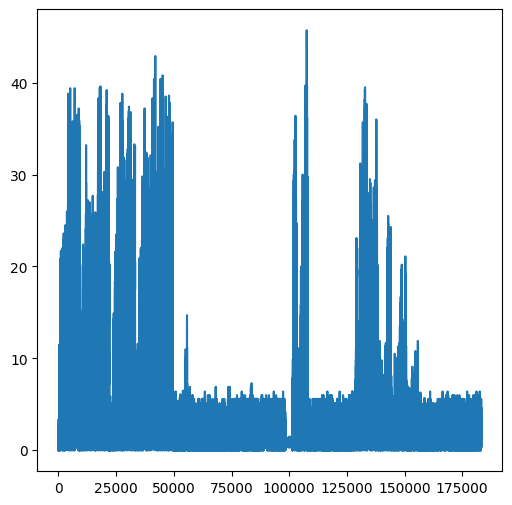

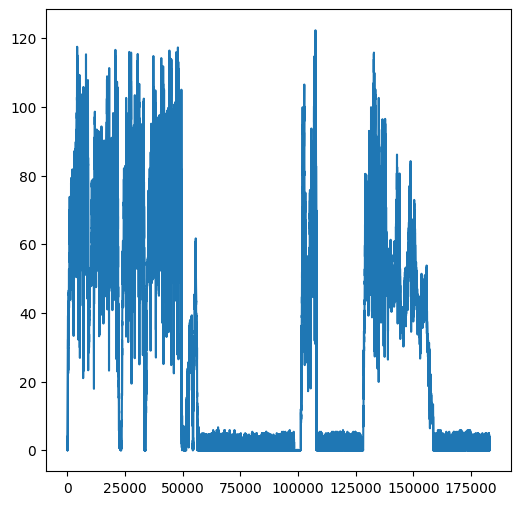

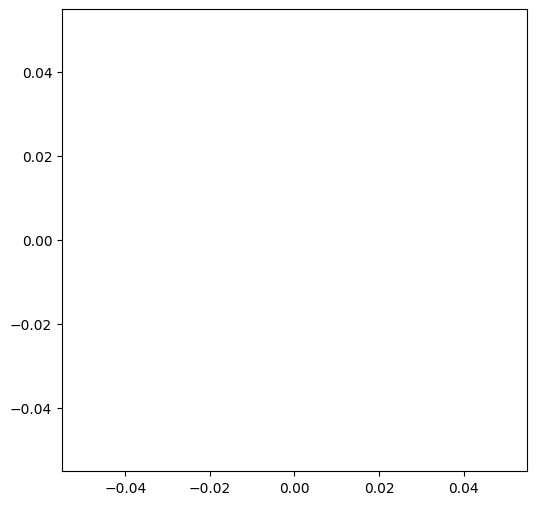

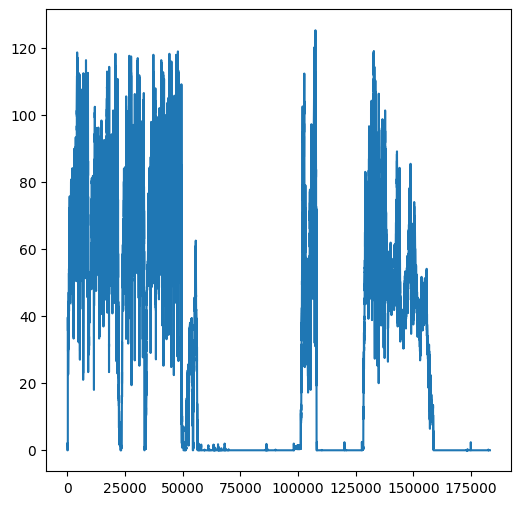

5.3434644517652865
30.61424985267185


In [50]:
# fig1, ax = plt.subplots(figsize =(8,8))
# ax.plot(data['idc'])
# fig2, ax = plt.subplots(figsize =(8,8))
# ax.plot(data['comm_torq'])

# fig1, ax = plt.subplots(figsize =(8,8))
# ax.plot(data['comm_torq'][4000:6000])
# fig2, ax = plt.subplots(figsize =(8,8))
# ax.plot(data['idc'][4000:6000])
fig4, ax = plt.subplots(figsize =(6,6))
ax.plot(data['id'])
fig2, ax = plt.subplots(figsize =(6,6))
ax.plot(data['vd'])
fig1, ax = plt.subplots(figsize =(6,6))
ax.plot(data['vq'])
fig1, ax = plt.subplots(figsize =(6,6))
ax.plot(data['v_peak_calc'])

fig1, ax = plt.subplots(figsize =(6,6))
ax.plot(data['v_peak'])
plt.show()
print(sum(data['vd'])/len(data['vd']))
print(sum(data['vq'])/len(data['vq']))